# Assignment 1: Comparison of Multivariate Linear Regression Models

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in the context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

PARAGRAPH
  The dataset I am using is a Housing prices dataset with a number of features, price for Y column. The data set is
computer generated, so it may not reflect the current reality of the housing market. The problem I am investigating is
how to evaluate the current marketplace value of a property based on various assets.


 * How big is your dataset? (in terms of MB)
      -----ANSWER:  The size of the dataset is 14 MB
 * How many entries does it have?
      -----ANSWER:  There appear to be 500,000 entries
 * How many features does it have?
      -----ANSWER:  There are 16 columns which is 16 features for each row of data.
 * What are some basic statistics you can learn right away about this dataset?

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/greenwing1985/housepricing/downloads/housepricing.zip/1"; # required url to download for CSV file. The TA will need to download the file and run your program.

def load_housing_data():
    return pd.read_csv("HousePrices_HalfMil.csv")

house = load_housing_data()
#check if the file is uploaded correctly
house.head()

house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
Area             500000 non-null int64
Garage           500000 non-null int64
FirePlace        500000 non-null int64
Baths            500000 non-null int64
White Marble     500000 non-null int64
Black Marble     500000 non-null int64
Indian Marble    500000 non-null int64
Floors           500000 non-null int64
City             500000 non-null int64
Solar            500000 non-null int64
Electric         500000 non-null int64
Fiber            500000 non-null int64
Glass Doors      500000 non-null int64
Swiming Pool     500000 non-null int64
Garden           500000 non-null int64
Prices           500000 non-null int64
dtypes: int64(16)
memory usage: 61.0 MB


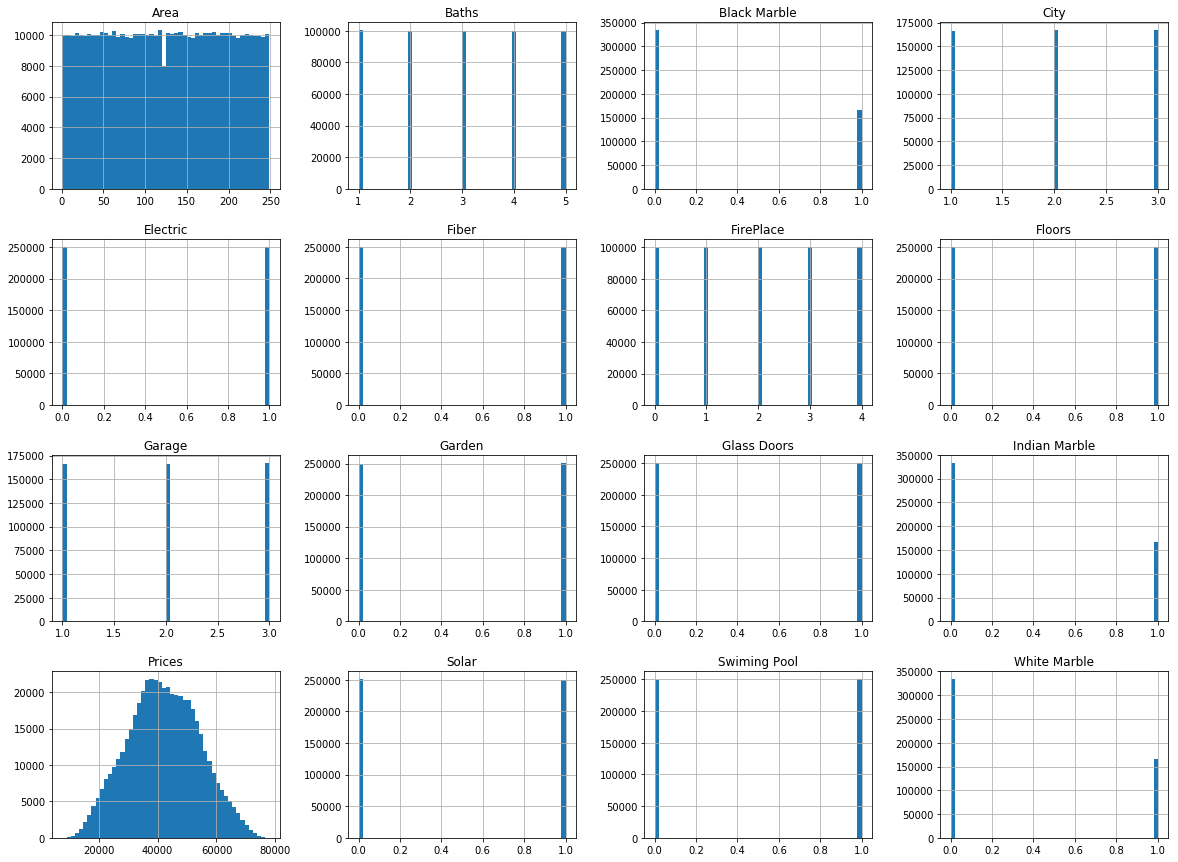

In [2]:
#Getting basic statistical data using histograms
house.hist(bins=50, figsize=(20,15))
plt.show()

#area and price are the only continous features. Baths, fireplaces, garage are counts of the number of them
#rest of variables are categorical. With City needing to be recoded


In [3]:
house.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [4]:
#the median area is 125 with a max area of 245. There is no manual on the data that can tell what units the area is in.
#The average garage space is 2 cars. With 2 fireplaces and 3 bathrooms. Marble tends not to occur. There is an even
#split between 0 and 1 floors. City has a categorical score between 1 to 3. Solar has an even split between 0 and 1. 
#Similarly Garden is split between 0 and 1 evenly. Average proice is 42,050 with a standard deviation of 12,110. 

---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

In [5]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#will use ordinal encoder since it was imported successfully
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#DATA CLEANING
        #there appears to be no missing info. Most features are categorical so will insert median value into those na
        #will insert median for area and price to be consistent
sample_incomplete_rows = house[house.isnull().any(axis=1)].head()
sample_incomplete_rows
        #there are appear to be no incomplete data in the data set




,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices


In [6]:
#one categorical variable must be transformed into dummy categories, city (which has 3 options:  1, 2, 3)
house = pd.get_dummies(house, columns=["City"])


#looking at correlations within data
corr_matrix = house.corr()
corr_matrix["Prices"].sort_values(ascending=False)



Prices           1.000000
Floors           0.619451
Fiber            0.484626
White Marble     0.448154
City_3           0.203316
Glass Doors      0.181973
Area             0.147717
Baths            0.145087
Garage           0.100294
FirePlace        0.089139
Electric         0.052443
Solar            0.008429
Swiming Pool     0.001787
Garden           0.001540
City_2          -0.002829
Black Marble    -0.078049
City_1          -0.200628
Indian Marble   -0.369756
Name: Prices, dtype: float64

In [7]:
#The floors, fiber, white marble appear to be highest correlated with Prices. This seems to be about the number of
#floors on the house, the use of whtie marble, and the location

In [67]:
#same seed each time
total_test, total_train = train_test_split(house, test_size = 0.1, random_state = 40)


# Your code goes here for this section.
y_train = pd.DataFrame(total_train["Prices"].copy())
X_train = total_train.drop("Prices", axis=1)

y_test = pd.DataFrame(total_test["Prices"].copy())
X_test = total_test.drop("Prices", axis=1)


In [68]:

#doing feature scaling here on X_train for area
area_mean = X_train["Area"].mean()
area_std = X_train["Area"].std()

X_train["Area"] = (X_train["Area"] - area_mean)/area_std

#to confirm, outputting head
X_train.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,City_1,City_2,City_3
49877,1.135911,3,4,4,0,1,0,0,0,0,0,1,1,0,0,1,0
137820,1.581858,1,3,1,0,1,0,0,1,0,0,1,0,1,0,1,0
51193,-0.104376,2,0,2,0,1,0,1,0,0,0,1,0,0,1,0,0
211197,-0.271606,1,1,5,1,0,0,0,1,1,0,0,0,0,1,0,0
87638,1.651537,3,2,2,1,0,0,0,0,0,0,1,1,1,0,1,0


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [170]:
#Inserting intecept
X_train["intercept"] = 1
X_test["intercept"] = 1

In [166]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation

class MyLinearRegression:
    def __init__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = .0002; # learning rate
        self.cost  = 0; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        self.theta = 0
        self.gradientDescent(X_train,y_train, self.theta, self.alpha, 200);
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here
        
        #there are 50,000 data points in train df
        #there are 18 columns
        m = 50000
        
        theta = np.random.randn(18,1)
        self.cost = np.empty(iters, dtype=float)
        i = 0
        
        for iteration in range(iters):
            error = X_train.dot(theta).sub(y_train.iloc[:,0],axis=0)
            gradient = (2/m)*X_train.T.dot(error)
            self.cost[i] = np.dot(error.T,error)
            theta = theta - self.alpha*gradient
            i = i+1
        self.theta = theta
    
    def predict(self, X_test):
        # implementation code here
        y_predict = X_test.dot(self.theta)
        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here for PART 4.
        df = X_train.T.dot(X_train)
        inverse_element = pd.DataFrame(np.linalg.pinv(df.values), df.columns, df.index)
        self.theta = inverse_element.dot(X_train.T).dot(y_train)
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.apha = 0.1
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)

myGDa = MyLinearRegression()
myGDa.alpha = .01
myGDa.fitUsingGradientDescent(X_train, y_train)
print("finished a")

myGDba = MyLinearRegression()
myGDba.alpha = .009
myGDba.fitUsingGradientDescent(X_train, y_train)
print("finished ba")

myGDb = MyLinearRegression()
myGDb.alpha = .001
myGDb.fitUsingGradientDescent(X_train, y_train)
print("finished b")

myGDc = MyLinearRegression()
myGDc.alpha = .0005
myGDc.fitUsingGradientDescent(X_train, y_train)
print("finished c")

finished a
finished ba
finished b
finished c


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

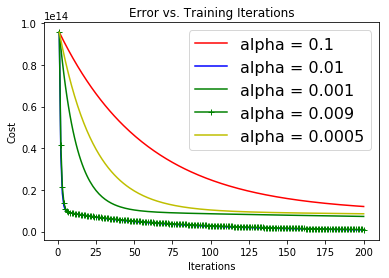

In [167]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.
iterations = np.empty(200, dtype=int)
i = 0
for iteration in range(200):
    iterations[i] = i + 1
    i = i + 1    
    
#print(myGradientDescentModel.theta)
plt.plot(iterations, myGradientDescentModel.cost, 'r-', label="alpha = 0.1")
plt.plot(iterations, myGDa.cost, 'b-', label="alpha = 0.01")
plt.plot(iterations, myGDb.cost, 'g-', label="alpha = 0.001")
plt.plot(iterations, myGDba.cost, 'g-+', label="alpha = 0.009")
plt.plot(iterations, myGDc.cost, 'y-', label="alpha = 0.0005")
plt.legend(loc="upper right", fontsize=16)
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  
plt.show()

In [ ]:
#It appears that the lowest cost over the 200 iterations comes from around learning rate 0.01.
#I will use the model myGDba for the validation section

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [182]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
X_train["Area"] = X_train["Area"]*area_std + area_mean

myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [186]:
from sklearn.metrics import mean_squared_error

#transforming x_test area data
X_test["Area"] = (X_test["Area"] - area_mean)/area_std
X_train["Area"] = (X_train["Area"] - area_mean)/area_std

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)


y_predict = myGDba.predict(X_test)
mse = mean_squared_error(y_test,y_predict)
myGradientDescentModel_rmse = np.sqrt(mse) 
print(myGradientDescentModel_rmse)



X_test["Area"] = X_test["Area"]*area_std + area_mean
y_predict = myNormalEquationModel.predict(X_test)
mse = mean_squared_error(y_test,y_predict)
myNormalEquationModel_rmse = np.sqrt(mse) 
print(myNormalEquationModel_rmse)



c:\python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1890.9402413453788
5965.8444132212235
3590.819416458514


In [188]:
# The closed form model performed the best out of
#my generated models.There may be something about how the data was "computer generated" that may have helped lead the
#SGD model to be superior overall though

#My error assessment is, overall, really good. There were 450,000 data points in the validation set. The machine 
#learning models at worst, produced a squared error of 6000 total between the predictions and the actual results.
#I do put this down to the data being computer generated, and thus incapable of being truly random. The
#machine learning algorithms might have happened upon the actual parameter values used to produce the data.

#I produce the parameter values below for the 2 models I created. I will finish my report using the Gradient descent
#model as the closed form involves heavily negative parameters for swimming pool and garden that cannot be easily 
#explained
print(myGDba.theta)
print(myNormalEquationModel.theta)


                          0
Area            1727.220200
Garage          3877.057772
FirePlace       1394.278138
Baths           2200.073379
White Marble    7231.689739
Black Marble     931.457352
Indian Marble  -2570.438329
Floors         10477.021199
Solar           1622.086484
Electric        2280.518750
Fiber           8484.432215
Glass Doors     4181.631149
Swiming Pool    1508.228344
Garden          1503.233072
City_1          -536.314632
City_2          1812.508355
City_3          4316.423501
intercept       5593.810701
                     Prices
Area           2.500000e+01
Garage         1.500000e+03
FirePlace      7.500000e+02
Baths          1.250000e+03
White Marble   1.053333e+04
Black Marble   1.533333e+03
Indian Marble -3.466667e+03
Floors         1.500000e+04
Solar          2.500000e+02
Electric       1.250000e+03
Fiber          1.175000e+04
Glass Doors    4.450000e+03
Swiming Pool  -9.631962e-12
Garden        -2.792810e-11
City_1        -6.333333e+02
City_2         2.866

- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [16]:
# Your paragraph goes here for this section
HERE ARE THE OPTIMAL PARAMETERS
Area            1727.220200
Garage          3877.057772
FirePlace       1394.278138
Baths           2200.073379
White Marble    7231.689739
Black Marble     931.457352
Indian Marble  -2570.438329
Floors         10477.021199
Solar           1622.086484
Electric        2280.518750
Fiber           8484.432215
Glass Doors     4181.631149
Swiming Pool    1508.228344
Garden          1503.233072
City_1          -536.314632
City_2          1812.508355
City_3          4316.423501
intercept       5593.810701

#In general, the real estate market values various assets independently of each other and precisely. If a glass door adds
#n value to one estate, it will also add n value at another estate. Being at City_1 location lowers property prices by
#500. Indian Marble will drop the value of a place by 2500 while White Marble can raise the value of a property by 
#7000. Significant additions to a place other white marble, would be more garage space, glass doors, fiber, and another
#floor. Finally being located in city_3 can dramateically raise the price of a location.

#I learned the actual syntax of pandas and np. I especially learned about manipulating data frames and applying linear
#math in the syntax. I learned about how influential changing a learning rate can affect gradient descent. Raising the
#learning rate by .004 from the perceived optimal learning rate caused the cost function to skyrocket. I would
#further improve the solution by looking at how features may effect each other. If glass doors impacts city correlation
#with price, then that could improve the solutions already created. 

#A final question would be how to interpret results from the closed form 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4501oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 1:...".

Best of luck and have fun!